In [1]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers
import matplotlib.pyplot as plt

In [3]:
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
def gen_seqential_model():
  model = Sequential([
      Input(4, name='input_layer'),
      Dense(4, activation='relu', name='hidden_layer1', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05)),
      # Dense(4, activation='relu', name='hidden_layer2', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05)),
      # Dense(8, activation='relu', name='hidden_layer3', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05)),
      # Dense(16, activation='leaky_relu', name='hidden_layer2', kernel_initializer=initializers.LecunNormal()),
      Dense(1, activation='relu', name='output_layer', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05))
  ])
  model.summary()
  
  model.compile(optimizer='sgd', loss='mse')
  return model

In [5]:
def gen_linear_regression_dataset(numofsamples=500, w1=3, w2=5, w3=10, w4=20, b=1):
  X = np.random.rand(numofsamples, 4)

  np.power(X[1], 2)
  np.power(X[2], 3)
  np.power(X[3], 4)

  # print(X)
  # print(X.shape)

  coef = np.array([w1, w2, w3, w4])
  bias = b
  # print(coef)
  # print(coef.shape)

  y = np.matmul(X, coef.transpose()) + bias
  # print(y)
  # print(y.shape)
  
  return X, y

In [6]:
def plot_loss_curve(history):
  plt.figure(figsize=(8, 4))
  plt.plot(history.history['loss'][1:])
  plt.plot(history.history['val_loss'][1:])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()

In [7]:
def predict_new_sample(model, x, w1=3, w2=5, w3=10, w4=20, b=1):
  x = x.reshape(1,4)
  np.power(x[0][1],2)
  np.power(x[0][2],3)
  np.power(x[0][3],4)

  y_pred = model.predict(x)[0][0]
  y_actual = w1*x[0][0] + w2*x[0][1] + w3*x[0][2] + w4*x[0][3] + b

  print("y actual value=", y_actual)
  print("y predicted value=", y_pred)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 4)                 20        
                                                                 
 output_layer (Dense)        (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
219/219 - 1s - loss: 8.5661 - val_loss: 6.3796e-04 - 762ms/epoch - 3ms/step
Epoch 2/300
219/219 - 0s - loss: 9.2363e-05 - val_loss: 2.3845e-05 - 312ms/epoch - 1ms/step
Epoch 3/300
219/219 - 0s - loss: 2.6754e-05 - val_loss: 2.3898e-05 - 329ms/epoch - 2ms/step
Epoch 4/300
219/219 - 0s - loss: 2.5879e-05 - val_loss: 2.3307e-05 - 382ms/epoch - 2ms/step
Epoch 5/300
219/219 - 0s - loss: 2.5393e-05 - val_loss: 2.3046e-05 - 317ms/epoch - 1ms/step


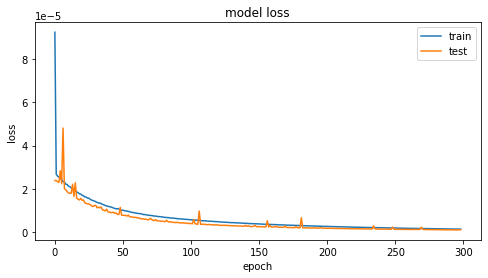

train_loss= 1.3880840015190188e-06
test_loss= 1.0939608046101057e-06
y actual value= 13.3
y predicted value= 13.299953
y actual value= 17.1
y predicted value= 17.09992
y actual value= 20.9
y predicted value= 20.899889
y actual value= 24.7
y predicted value= 24.699856
y actual value= 28.5
y predicted value= 28.499826
y actual value= 32.3
y predicted value= 32.299793
y actual value= 18.1
y predicted value= 18.099827
y actual value= 12.9
y predicted value= 12.899775
y actual value= 12.2
y predicted value= 12.199703
y actual value= 7.7
y predicted value= 7.699884


In [8]:
model = gen_seqential_model()
X, y = gen_linear_regression_dataset(numofsamples=10000)
history = model.fit(X, y, epochs=300, verbose=2, validation_split=0.3)
plot_loss_curve(history)
print("train_loss=", history.history['loss'][-1])
print("test_loss=", history.history['val_loss'][-1])

predict_new_sample(model, np.array([0.1, 0.2, 0.3, 0.4]))
predict_new_sample(model, np.array([0.2, 0.3, 0.4, 0.5]))
predict_new_sample(model, np.array([0.3, 0.4, 0.5, 0.6]))
predict_new_sample(model, np.array([0.4, 0.5, 0.6, 0.7]))
predict_new_sample(model, np.array([0.5, 0.6, 0.7, 0.8]))
predict_new_sample(model, np.array([0.6, 0.7, 0.8, 0.9]))
predict_new_sample(model, np.array([0.7, 0.8, 0.9, 0.1]))
predict_new_sample(model, np.array([0.8, 0.9, 0.1, 0.2]))
predict_new_sample(model, np.array([0.9, 0.1, 0.2, 0.3]))
predict_new_sample(model, np.array([0.4, 0.3, 0.2, 0.1]))